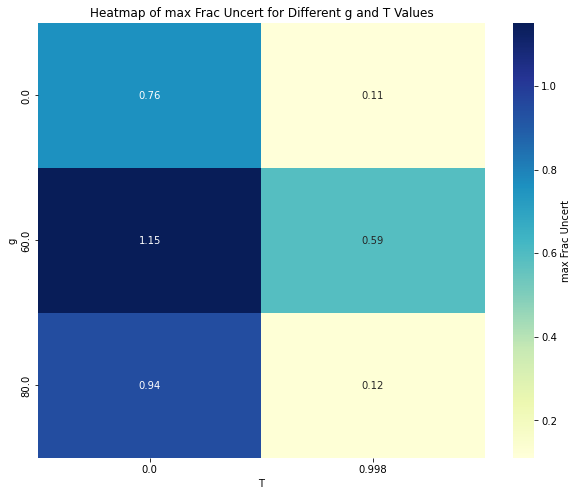

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import re
import numpy as np

# Define the pattern to match the CSV files
file_pattern = '/disk/data/youssef/scripts/xrb-population/results/*.csv'
csv_files = [file for file in glob(file_pattern) if "full" not in file]

# Function to extract parameter values from filenames
def extract_parameters(filename):
    pattern = r'table_g(?P<g>\d+\.\d+)_T(?P<T>\d+\.\d+)_a(?P<a>\d+\.\d+)_m(?P<m>\d+\.\d+)_i(?P<i>\d+\.\d+)_r(?P<r>\d+\.\d+)_e(?P<e>\d+\.\d+)\.csv'
    match = re.search(pattern, filename)
    if match:
        return {key: float(value) for key, value in match.groupdict().items()}
    else:
        return None

# List to store summary statistics
summary_data = []

# Process each file
for file in csv_files:
    parameters = extract_parameters(file)
    if parameters:
        df = pd.read_csv(file)
        # Calculate the max frac_uncert for the current file
        if 'frac_uncert' in df.columns:
            # Replace frac_uncert values greater than 1 with NaN
            df['frac_uncert'] = df['frac_uncert'].apply(lambda x: 2 if x > 1 else x)
            max_frac_uncert = df['frac_uncert'].max()
            # Create a dictionary combining parameters and the calculated max_frac_uncert
            summary_record = parameters.copy()
            summary_record['max_frac_uncert'] = max_frac_uncert
            summary_data.append(summary_record)

# Create a summary DataFrame
summary_df = pd.DataFrame(summary_data)

# Ensure summary_df contains the 'max_frac_uncert' column
if 'max_frac_uncert' not in summary_df.columns:
    raise ValueError("The 'max_frac_uncert' column is missing from the summary DataFrame")

# Example visualization: Heatmap of max_frac_uncert for g and T
heatmap_data = summary_df.pivot_table(index='i', columns='a', values='max_frac_uncert')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'max Frac Uncert'})
plt.title("Heatmap of max Frac Uncert for Different g and T Values")
plt.xlabel("T")
plt.ylabel("g")
plt.show()


In [12]:
import plotly.express as px

fig = px.scatter_matrix(summary_df, dimensions=['g', 'T', 'a', 'm', 'i', 'r', 'e', 'max_frac_uncert'],height=1200, width=1200)
fig.show()